In [1]:
from rdflib import Graph
import io
import os
from IPython.display import SVG, display
from rdflib.tools.rdf2dot import rdf2dot
import httpx
endpoint = 'http://prov-loadba-z1mq3hc1iwb6-0953be8432f34fc1.elb.ap-southeast-2.amazonaws.com:3030/prov'

In [2]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts={display})
    dotdata = stream.getvalue()
    dotdata = dotdata.replace('https://data.surroundaustralia.com/dataset/provworkflows/', 'pwfs:')
    with open('graph.dot', 'w') as f:
        f.write(dotdata)
    os.system('dot -Nranksep=0.75 -Nnodesep=0.75 -Grankdir=LR -Eweight=1.2 -Tsvg graph.dot -o prov.svg')
    # dg = pydotplus.graph_from_dot_data(stream.getvalue())
    # svg = dg.create_svg()
    display(SVG('prov.svg'))

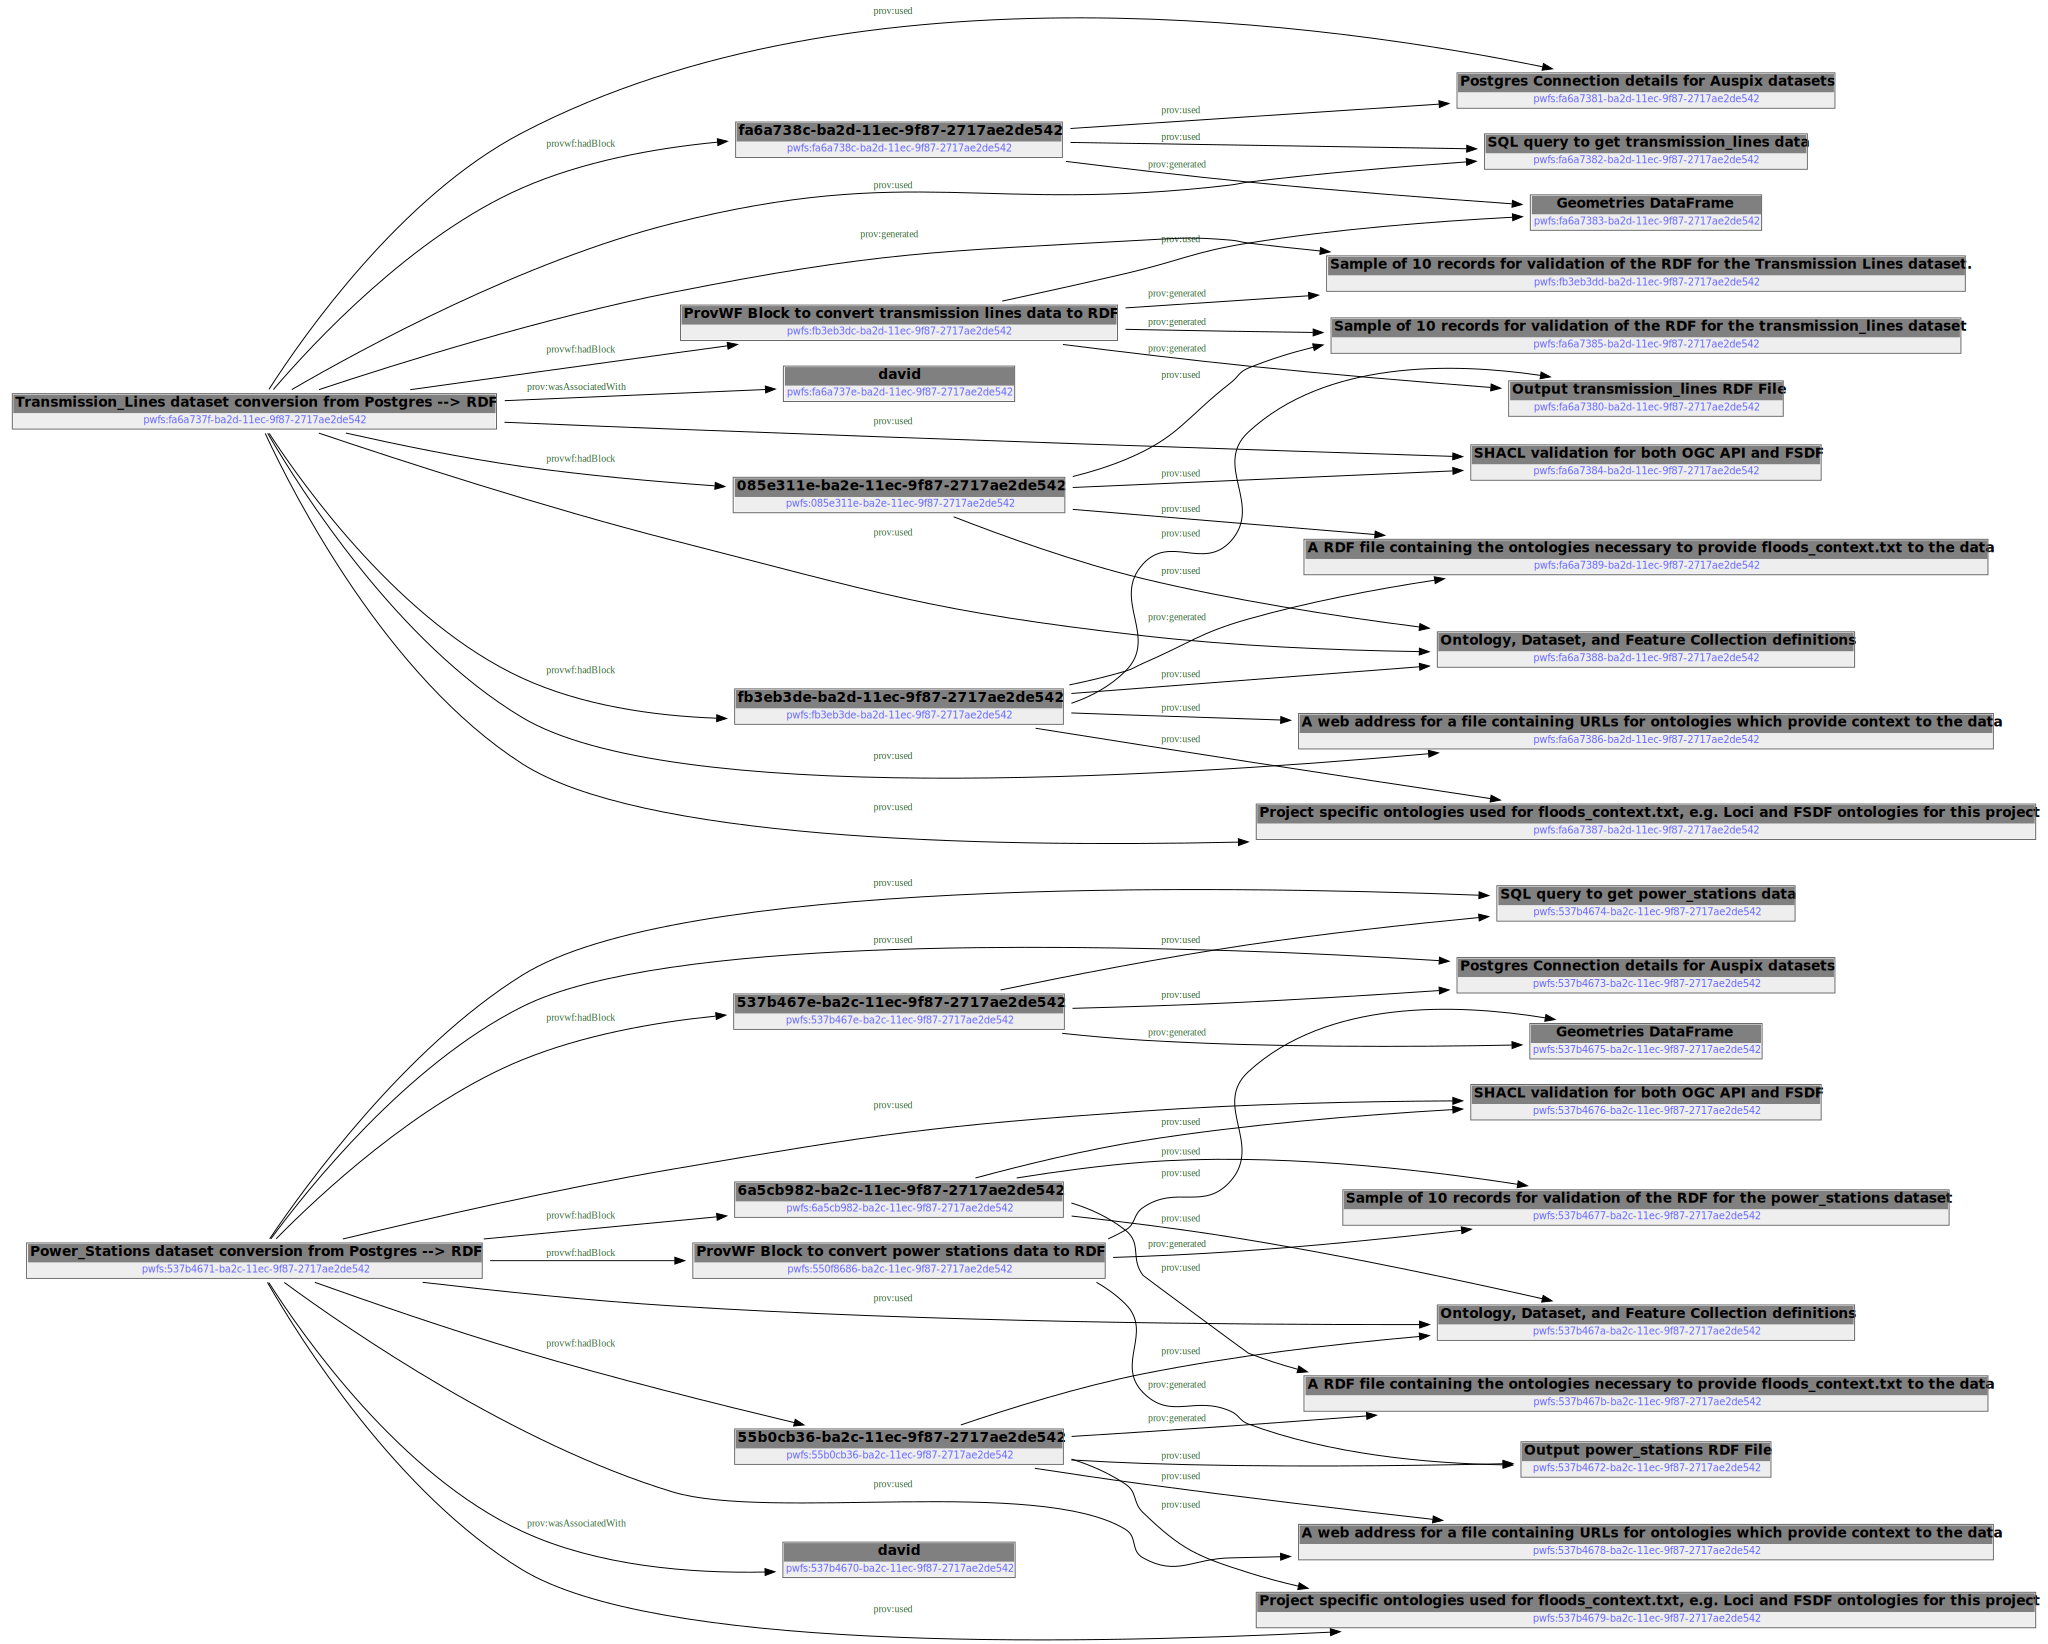

In [5]:
query = """PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX provwf: <https://data.surroundaustralia.com/def/provworkflow/>
CONSTRUCT {?s ?p ?o }
WHERE {GRAPH ?g {?s ?p ?o
FILTER(?p IN(rdfs:label,
            prov:used,
            prov:generated,
            prov:wasAssociatedWith,
            provwf:hadBlock
            )) }} """
result = httpx.post(endpoint, data={'query': query})
results_graph=Graph().parse(data=result.content)
visualize(results_graph)